<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module1_Neural_Systems/blob/main/L07-Self-Organizing%20Maps%20(SOM)%20and%20Unsupervised%20Learning/Self_Organizing_Maps_(SOM)_and_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Section 1: Introduction and Theoretical Background**



#### **1. Aims & Schedule**
- **Comparison of Supervised vs. Unsupervised Learning**:
  - **Supervised Learning**: A model is trained on labeled data. The algorithm learns the mapping from input to the desired output.
    - Example: Classification of images, where each image has a known label.
  - **Unsupervised Learning**: The model tries to find patterns in data without any explicit labels. It groups similar data points together.
    - Example: Clustering customer data based on purchasing behavior.

  - **MATLAB Demonstration**: A simple illustration of supervised vs. unsupervised learning can be created using MATLAB clustering functions.
    ```matlab
    %% Supervised Learning Example using Support Vector Machine (SVM)

    % Generate random data for two classes:
    % Class 1 centered around (1,1), and Class 2 centered around (-1,-1)
    X = [randn(100,2)+1; randn(100,2)-1];

    % Define the labels:
    % Class 1: label 1 for the first 100 points
    % Class 2: label -1 for the second 100 points
    Y = [ones(100,1); -ones(100,1)];

    % Train a Support Vector Machine (SVM) classifier
    SVMModel = fitcsvm(X, Y);

    % Display SVM model details
    disp('SVM Model Trained:');
    disp(SVMModel);

    % Visualize the data points
    figure;
    gscatter(X(:,1), X(:,2), Y, 'rb', 'xo'); % Scatter plot for the two classes
    hold on;

    % Plot the decision boundary
    % Create a grid of points to evaluate the SVM decision function
    [x1Grid, x2Grid] = meshgrid(min(X(:,1)):0.1:max(X(:,1)), min(X(:,2)):0.1:max(X(:,2)));
    XGrid = [x1Grid(:), x2Grid(:)];

    % Predict the classes for each point in the grid
    [~, scores] = predict(SVMModel, XGrid);

    % Plot the decision boundary and margins
    contour(x1Grid, x2Grid, reshape(scores(:,2), size(x1Grid)), [0 0], 'k'); % Decision boundary
    contour(x1Grid, x2Grid, reshape(scores(:,2), size(x1Grid)), [-1 1], '--k'); % Margins
    title('Supervised Learning: SVM Decision Boundary');
    hold off;

    %% Unsupervised Learning Example using k-means Clustering

    % Generate random data for clustering
    data = [randn(100,2)+1; randn(100,2)-1];

    % Apply k-means clustering to group the data into 2 clusters
    idx = kmeans(data, 2);

    % Display clustering results
    disp('k-means clustering results:');
    disp('Cluster assignment for each data point:');
    disp(idx);

    % Visualize the clusters
    figure;
    gscatter(data(:,1), data(:,2), idx, 'rb', 'xo'); % Color points based on cluster assignment
    title('Unsupervised Learning: Clustering with k-means');

    % Additional Visualization: Compare true labels with k-means clustering
    % Generate true labels for comparison (same structure as in SVM example)
    trueLabels = [ones(100,1); -ones(100,1)];

    % Visualize the true labels as a scatter plot
    figure;
    gscatter(data(:,1), data(:,2), trueLabels, 'rb', 'xo'); % True classes plot
    title('Original Data with True Labels');

    % Visualize the k-means clusters alongside the true labels for comparison
    figure;
    subplot(1, 2, 1); % Plot 1: Clustering results
    gscatter(data(:,1), data(:,2), idx, 'rb', 'xo');
    title('k-means Clustering Results');

    subplot(1, 2, 2); % Plot 2: True labels
    gscatter(data(:,1), data(:,2), trueLabels, 'rb', 'xo');
    title('True Labels vs. k-means Clustering');
    ```



#### **2. Human Intelligence and Pattern Recognition**
- **Plausible Reasoning**: This is the ability of humans to make educated guesses or inferences based on incomplete information.
  - **Pattern Recognition**: A key aspect of human intelligence, involving the ability to recognize recurring patterns, shapes, or relationships in data.
    - Example: Recognizing letters or words when only parts are visible.



#### **3. Unsupervised Learning**
- Unsupervised learning models explore the structure of data and organize it without any labels.
  - **Clustering**: Grouping similar data points together. SOM is a powerful method for clustering.
  - **Pattern Recognition**: This involves identifying patterns in data without pre-defined labels.



  - **MATLAB Demonstration: Basic Clustering Using SOM**:
    ```matlab
    % Load the Iris dataset
    % The 'meas' variable contains the features (sepal length, sepal width, petal length, petal width)
    load fisheriris;
    data = meas; % Extract the data from the 'meas' variable

    % Display a message indicating data loading success
    disp('Fisher Iris dataset loaded successfully:');
    disp('First five rows of data:');
    disp(data(1:5, :)); % Display the first 5 rows for inspection

    % Train SOM for clustering
    dimension = [10 10]; % Set the dimensions for the SOM grid (10x10 neurons)
    net = selforgmap(dimension); % Create a Self-Organizing Map (SOM) with specified grid dimensions

    % Train the SOM using the input data
    % Note: the data needs to be transposed (data') because the 'train' function expects observations as columns
    net = train(net, data');

    % Display the SOM architecture
    view(net); % This will open a new window showing the SOM structure (grid of neurons)

    %%
    % Visualize the SOM clustering results
    outputs = net(data'); % Obtain the SOM's response for each data point (which neuron it was mapped to)

    % Display the clustering outputs
    disp('SOM output (neuron assignment for each data point):');
    disp(outputs);
    %%
    % Visualize the positions of the neurons in relation to the input data
    figure;
    plotsompos(net, data); % Visualize SOM neuron positions and how they map to data points
    title('SOM Clustering Visualization');

    %%
    % Additional Visualization: Color the SOM neurons according to the class labels
    % The Fisher Iris dataset has 3 known classes, stored in the 'species' variable
    % Let's visualize which neurons are associated with each class
    species = grp2idx(species); % Convert species names into numeric labels (1, 2, 3)

    % Map the class labels to the corresponding SOM neuron for each data point
    % We will use gscatter to create a scatter plot with colors representing the classes
    figure;
    gscatter(data(:,1), data(:,2), species); % Plot Sepal Length vs Sepal Width colored by class
    title('Original Data (Sepal Length vs Sepal Width) Colored by Class');

    %%
    % Visualize SOM classification for comparison
    % We'll use the neuron assignments from SOM (outputs) to color the data points
    % and compare with the actual class labels
    neuronIndex = vec2ind(outputs); % Convert neuron outputs to indices (i.e., the neuron each data point was mapped to)

    figure;
    gscatter(data(:,1), data(:,2), neuronIndex); % Plot Sepal Length vs Sepal Width colored by neuron
    title('SOM Neuron Mapping of Data (Sepal Length vs Sepal Width)');
    ```



#### **4. Pattern Recognition**
- Pattern recognition is used to classify objects into pre-defined categories based on their features.
  - **Applications**:
    - **Optical Character Recognition (OCR)**: Recognizing printed or handwritten text.
    - **Speech Recognition**: Converting spoken words into text.
    - **Data Mining**: Finding useful patterns in large datasets.
  


#### **5. Face Recognition and Object Classification**
- Face recognition is a specific application of pattern recognition, where algorithms identify a face based on unique features.
  - The classification extends to attributes like **gender**, **age**, **mood**, etc.
  - **Feature Extraction**: Key step in object classification, where features like edges, contours, or textures are identified and used for classification.


##### Observation:

Various algorithms under supervised and unsupervised learning in AI, categorized based on their functionality.

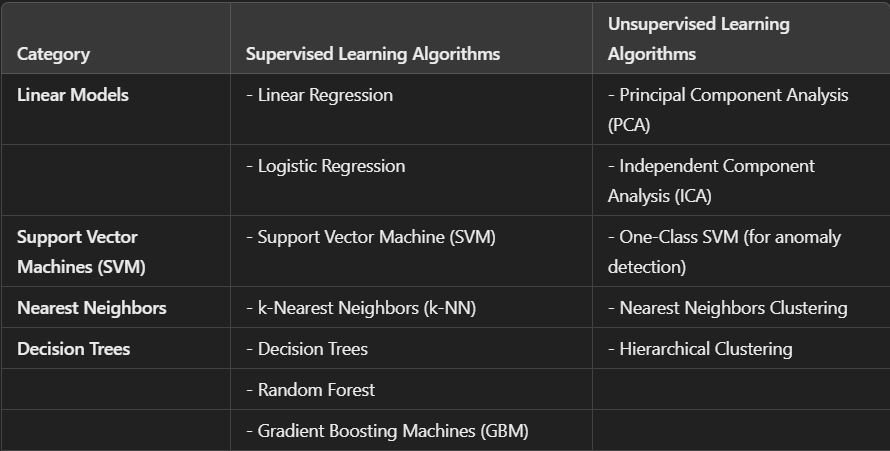

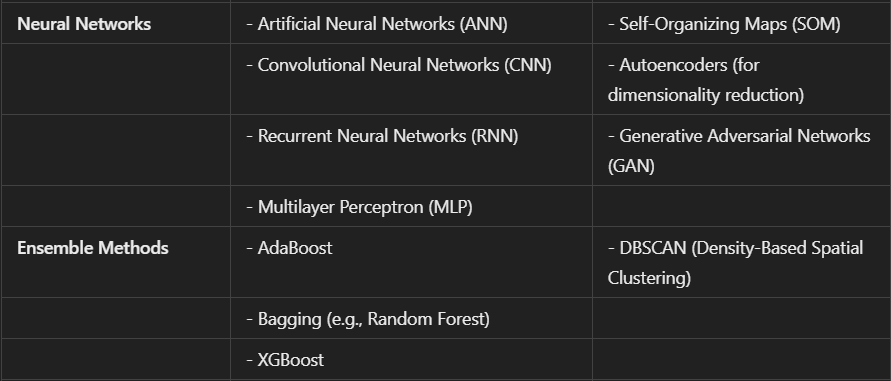

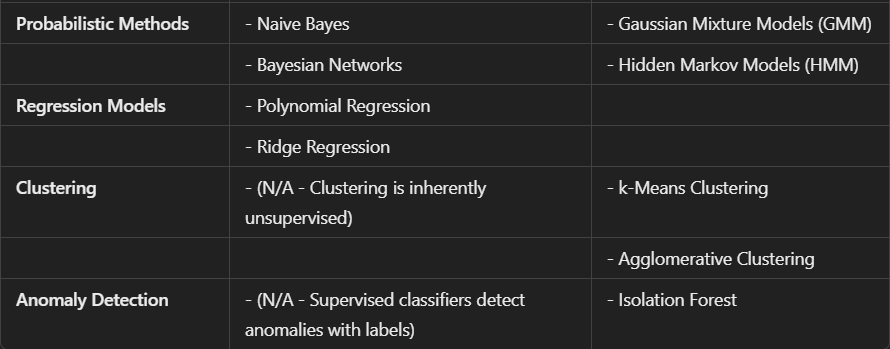


### **Section 2: Self-Organizing Maps and Algorithm**



#### **6. Self-Organizing Maps (SOM)**
- **Introduction of SOM**:
  - Developed by **Teuvo Kohonen** in the 1980s, SOM is an unsupervised learning algorithm used for organizing data based on its similarity.
  - The biological basis behind SOMs is inspired by how the human brain organizes and processes information.
  - **Use Case**: SOM is commonly used for **visualization** and **clustering** of high-dimensional data.


  
#### **7. SOM Architecture**
- **SOM Grid**:
  - SOM is structured as a grid (usually 2D) of neurons.
  - Each neuron has a **weight vector** representing its position in the input space.
  - When input data is fed to the network, the neuron whose weight vector is closest to the input vector (in terms of distance) is considered the **winning neuron**.

- **Winning Neuron**: This neuron and its neighbors are updated to better match the input vector. Over time, the neurons' weight vectors become more representative of the input data.



#### **8. SOM Algorithm Overview**
- **Step-by-Step Algorithm**:
  1. **Initialize Weights**: Weights of all neurons are initialized randomly.
  2. **Select Input Vector**: Randomly pick an input vector from the dataset.
  3. **Find Winning Neuron**: The neuron whose weight vector is closest to the input vector is identified as the winner.
  4. **Update Weights**: The weights of the winning neuron and its neighbors are adjusted closer to the input vector.
  5. **Adjust Learning Rate and Neighborhood Function**: Both the **learning rate** and **neighborhood size** shrink over time.
  
  This process is repeated for a set number of iterations or until convergence is reached.
  


  - **MATLAB Demonstration: SOM Algorithm**:


1. **Data Loading**:
   - The code starts by loading the Iris dataset and displaying the first five rows using `disp` to ensure the data is loaded correctly.

   ```
    % Load the Iris dataset
    % The 'meas' variable contains the feature data: sepal length, sepal width, petal length, and petal width
    load fisheriris;
    data = meas; % Extract the feature data for training the SOM

    % Display a message indicating that the data has been loaded successfully
    disp('Fisher Iris dataset loaded successfully:');
    disp('First five rows of data:');
    disp(data(1:5, :)); % Display the first 5 rows of the dataset

   ```

2. **SOM Initialization and Training**:
   - The Self-Organizing Map (SOM) is initialized with a 10x10 grid (`som_dimension`), and the SOM is trained on the transposed Iris dataset (`data'`).

   ```
   %%

    % Initialize a Self-Organizing Map (SOM)
    % Define the SOM grid size as 10x10 neurons, which will cluster the data
    som_dimension = [10 10];
    net = selforgmap(som_dimension); % Create a SOM with the specified grid dimensions

    % Train the SOM on the Iris data
    % The data is transposed because the SOM expects input vectors as columns
    net = train(net, data');

    % Display the SOM architecture in a separate window
    view(net);

   ```

3. **Visualization of Neuron Positions**:
   - After training, the `plotsompos` function visualizes the position of the neurons and their relationship to the data points.

  ```
    
    % Visualize the SOM Neuron Positions
    % This plot shows the positions of the neurons in relation to the input data
    figure;
    plotsompos(net, data);
    title('SOM Neuron Position');

  ```

4. **SOM Output Display**:
   - The `outputs` variable holds the SOM's neuron assignments for each data point, and the neuron assignments for the first five data points are displayed using `disp`.

  ```
    
    % Display the output SOM response (neuron assignment for each data point)
    outputs = net(data'); % Get the SOM's response for each data point (which neuron it's assigned to)

    % Display the neuron assignments for the first 5 data points
    disp('SOM Neuron assignments for the first five data points:');
    disp(outputs(:, 1:5)); % Display assignments for the first 5 data points

  ```

5. **Comparing SOM Clustering with True Iris Species**:
   - The true Iris species are converted to numeric labels using `grp2idx` for comparison.
   - The script generates scatter plots showing:
     - The original data points colored by their true species.
     - The SOM clustering results, where data points are colored by their assigned neurons.
   - A side-by-side comparison of true labels vs. SOM neuron assignments is provided using `subplot`, making it easy to compare the clustering performance of the SOM.

  ```
    
    % Additional Visualization: Compare SOM clustering with true Iris species labels

    % Convert the species names (setosa, versicolor, virginica) to numeric labels (1, 2, 3)
    species = grp2idx(species);

    % Scatter plot to visualize the data using the first two features (Sepal Length and Sepal Width)
    figure;
    gscatter(data(:,1), data(:,2), species, 'rgb', 'osd'); % Color the points based on species
    title('Original Data (Sepal Length vs Sepal Width) Colored by Species');

    % SOM-based clustering visualization using neuron assignments
    % We'll convert the SOM output (neuron responses) into neuron indices
    neuronIndex = vec2ind(outputs); % Convert the neuron responses into integer neuron indices

    figure;
    gscatter(data(:,1), data(:,2), neuronIndex, 'rgb', 'osd'); % Color the points based on SOM neuron assignment
    title('SOM Neuron Mapping of Data (Sepal Length vs Sepal Width)');

    % Side-by-side comparison of true species labels and SOM neuron assignment
    figure;
    subplot(1, 2, 1); % Plot 1: True species labels
    gscatter(data(:,1), data(:,2), species, 'rgb', 'osd'); % Visualize Sepal Length vs Sepal Width by species
    title('True Species Labels');

    subplot(1, 2, 2); % Plot 2: SOM neuron assignment
    gscatter(data(:,1), data(:,2), neuronIndex, 'rgb', 'osd'); % Visualize Sepal Length vs Sepal Width by neuron index
    title('SOM Neuron Assignment');

  ```


#### **9. SOM Output Interpretation**
- **Feature Maps**:
  - After training, each neuron in the SOM grid represents a cluster of similar input data points.
  - By examining the distribution of neurons across the grid, patterns in the data can be observed.
  
- **U-Matrix**:
  - The **U-Matrix** (Unified Distance Matrix) is a common method to visualize the distances between neurons. Large distances indicate boundaries between clusters.
  
  - **MATLAB Demonstration: U-Matrix Visualization**:

1. **Load the Iris Dataset**
```matlab
% Load the Iris dataset
load fisheriris;
data = meas; % Extract the features (sepal length, sepal width, petal length, petal width)
```
Explanation:
- The `fisheriris` dataset is loaded, which consists of 150 samples of Iris flowers.
- `meas` holds the feature data of the dataset (sepal and petal measurements), which is assigned to `data`. This will serve as the input to train the Self-Organizing Map (SOM).

2. **Train the SOM**
```matlab
% Train SOM
net = selforgmap([10 10]); % Create a 10x10 SOM grid
net = train(net, data'); % Train the SOM on the transposed data (observations as columns)
```
Explanation:
- `selforgmap([10 10])`: Initializes a Self-Organizing Map (SOM) with a grid size of 10x10 neurons. The SOM will try to map the 150 data points onto this grid.
- `train(net, data')`: The `train` function is used to train the SOM using the `data`. The data is transposed (`data'`) because the SOM expects each column to be an input vector, and `meas` has samples in rows.
- After training, the SOM organizes the data into clusters by assigning each data point to one of the 10x10 neurons.

3. **Plot U-Matrix (Unified Distance Matrix)**
```matlab
% Plot U-Matrix
figure;
plotsom(net.layers{1}.positions); % Visualize the neurons' grid positions
title('SOM U-Matrix Visualization');
```
Explanation:
- The **U-Matrix** is a common way to visualize the trained SOM. It represents the distances between neighboring neurons, giving an idea of how similar or different the clusters are.
- `plotsom(net.layers{1}.positions)`: This function visualizes the positions of the neurons in the SOM grid. It helps to see the layout of the 10x10 grid and how the neurons are distributed.
- The figure produced will show the grid of neurons, and clusters can be inferred by observing the spacing between neurons.



#### **10. SOM Algorithm Details**
- **Distance Calculation**: The Euclidean distance is commonly used to calculate the distance between the input vector and each neuron's weight vector.
  
  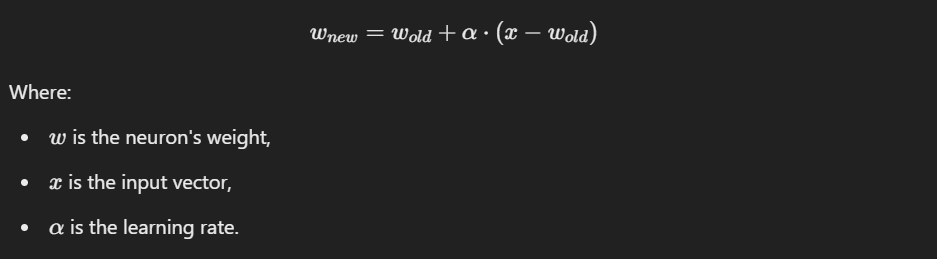
  
  - **Neighborhood Function**: Neurons close to the winning neuron are also updated, but to a lesser extent. The neighborhood size shrinks as training progresses.


### **Section 3: Visualization, Application, and Alternatives**



#### **11. SOM Visualization**
- **SOM Visualization Overview**:
  - One of the strengths of SOM is its ability to reduce high-dimensional data into a 2D map, making it easier to visualize patterns and clusters.
  - **Application Examples**:
    - **World Bank’s Poverty Map**: SOMs can be used to map socio-economic data to visualize poverty across different regions.
    - **Customer Data Mining**: SOM can cluster customers into different groups based on purchasing behavior or demographics, helping businesses understand customer segments.

  - **MATLAB Demonstration: Visualizing Clustering**:

Here’s your MATLAB code broken down into sections with explanations, enhanced with additional `disp()` statements and visualizations to make the process more understandable:

1. **Generate Sample Data (Customer Purchasing Behavior)**
    ```matlab
    % Load sample data (customer purchasing behavior data)
    data = randn(300, 4); % Randomly generated data with 300 samples and 4 features

    % Display data information
    disp('Sample customer purchasing behavior data generated:');
    disp('First 5 rows of the data:');
    disp(data(1:5, :)); % Display the first 5 rows to inspect the data
    ```
Explanation:
- `randn(300,4)`: Generates random data that simulates customer purchasing behavior with 300 samples (customers) and 4 features (attributes such as purchase frequency, amount spent, etc.).
- The `disp()` function is used to show the first 5 rows of the generated data, giving a sense of how the data looks.
  
2. **Train the Self-Organizing Map (SOM)**
    ```matlab
    % SOM training
    net = selforgmap([10 10]); % Define a SOM with a 10x10 grid (100 neurons)
    disp('SOM initialized with a 10x10 grid.');

    net = train(net, data'); % Train the SOM using the transposed data
    disp('SOM training completed.');
    ```
Explanation:
- `selforgmap([10 10])`: Initializes a SOM with 100 neurons arranged in a 10x10 grid. Each neuron will map to one or more data points, and the SOM will organize the data based on similarity.
- `train(net, data')`: Trains the SOM on the transposed data (`data'`), as the SOM expects the observations as columns. The `disp()` messages indicate when the SOM is initialized and after training is completed, helping track the process.

3. **Visualize SOM Neuron Positions with Data**
    ```matlab
    % SOM Visualization: Plot neuron positions and data
    figure;
    plotsompos(net, data); % Visualize neuron positions with the data points
    title('SOM Visualization: Customer Data Mining');
    disp('SOM neuron positions visualized along with customer data.');
    ```
Explanation:
- `plotsompos(net, data)`: This function visualizes the positions of the SOM neurons and shows how they map the data points (customers). Each neuron represents a cluster of similar customers.
- A `disp()` message is added to indicate that the visualization is complete.

4. **Additional Visualizations and Data Distribution**
    ```matlab
    % Visualizing the distribution of data for each feature
    figure;
    for i = 1:4
        subplot(2, 2, i); % Create a 2x2 grid of subplots
        histogram(data(:, i)); % Plot histogram of each feature
        xlabel(['Feature ', num2str(i)]);
        ylabel('Frequency');
        title(['Distribution of Feature ', num2str(i)]);
    end
    disp('Feature distribution histograms plotted.');
    ```
Explanation:
- **Histograms for Features**: This section creates histograms for each of the 4 features in the data to give a sense of the data distribution for each feature.
- The loop creates 4 subplots, each showing the distribution of a feature, helping visualize the range and spread of customer purchasing behavior across the different attributes.
  
5. **Compare SOM Clusters with Feature Pairs**
    ```matlab
    % Visualizing clusters for selected feature pairs
    figure;
    gscatter(data(:,1), data(:,2), vec2ind(net(data')), 'rgb', 'osd'); % Color data based on SOM neuron assignment
    xlabel('Feature 1');
    ylabel('Feature 2');
    title('SOM Clustering (Feature 1 vs Feature 2)');
    disp('SOM clusters visualized for Feature 1 vs Feature 2.');
    ```
Explanation:
- **Cluster Visualization**: This plot shows how the data points (customers) are clustered by the SOM based on their first two features. The `gscatter()` function plots the first two features, coloring the points based on the SOM neuron assignment (cluster) using `vec2ind(net(data'))`.
- This plot allows you to see how the SOM clusters relate to the original data.



#### **12. Using SOM for New Data**
- Once a SOM is trained, it can be used to classify new input data by finding the closest matching neuron.
  - The new data is assigned to the cluster represented by the winning neuron.
  - **Practical Application**:
    - Suppose the SOM was trained on customer purchasing data; new customers could be classified into the closest cluster based on their behavior.

  - **MATLAB Demonstration: Classifying New Data**:
    ```matlab
    % Assume SOM is already trained on data
    new_data = randn(1,4); % New customer data with 4 features

    % Classify the new data
    winner_neuron = vec2ind(net(new_data')); % Find the winning neuron for the new data
    disp(['New data belongs to neuron: ', num2str(winner_neuron)]);

    % Visualization: Mark the position of the new data
    figure;
    plotsompos(net, data); % Plot existing data
    hold on;
    plot(new_data(1), new_data(2), 'rx', 'MarkerSize', 12, 'LineWidth', 2); % Plot new data point
    title('Classifying New Data with SOM');
    ```



#### **13. SOM Parameters**
- **Learning Rate**:
  - The learning rate controls how much the weights are adjusted during each iteration of training. It starts high and gradually decreases as training progresses.
  - A high learning rate causes large updates, whereas a low learning rate results in fine-tuned updates.
  
- **Neighborhood Function**:
  - The **neighborhood function** determines which neurons around the winning neuron are updated and by how much.
  - The size of the neighborhood also decreases over time, allowing fine adjustments to be made during the later stages of training.



#### **14. Neighborhood Function**
- The neighborhood function defines how much neighboring neurons are updated in response to a winning neuron.
  - **Gaussian Function**: Updates neurons based on a bell-shaped curve, with the winning neuron receiving the largest update.
  - **Mexican Hat Function**: Updates nearby neurons positively, but neurons further away may receive negative updates.
  
  - **MATLAB Demonstration: Adjusting Neighborhood Function**:
    ```matlab
    % Load data
    load fisheriris;
    data = meas;

    % Adjust neighborhood function to Gaussian
    net = selforgmap([10 10], 100, 3, 'hextop', 'dist'); % Gaussian neighborhood
    net = train(net, data'); % Train the network

    % Visualization: Plot SOM positions
    figure;
    plotsompos(net, data);
    title('SOM with Gaussian Neighborhood Function');
    ```



#### **15. SOM Disadvantages**
- **Large Dataset Requirements**: SOMs require a substantial amount of data to produce meaningful and reliable clusters. Small datasets may result in overfitting or poor generalization.
  
- **No Standard Quality Measure**:
  - Unlike other clustering methods (e.g., k-means), there’s no universally accepted measure to evaluate the quality of SOMs.
  - Quality assessment often relies on visual inspection (e.g., U-Matrix), which can be subjective.



#### **16. SOM Alternatives**
- Several alternatives to SOM exist that attempt to address some of its limitations:
  - **Generative Topographic Mapping (GTM)**:
    - A probabilistic alternative to SOM, providing a more mathematically rigorous way to map high-dimensional data onto a lower-dimensional space.
  - **Growing SOMs (e.g., Neural Gas)**:
    - These models allow the number of neurons to grow dynamically based on the data’s complexity. This is useful for datasets with an unknown or variable structure.



#### **17. Other Unsupervised Learning Techniques**
- **Hebbian Learning**:
  - Inspired by the way neurons in the brain learn through strengthening connections when they fire together. Hebbian learning is the basis for many biologically inspired learning algorithms.
  
- **Auto-associative Networks**:
  - These networks are designed to store and recall patterns by learning from the input data itself, typically through self-reinforcing feedback loops.
  
- **Adaptive Resonance Theory (ART)**:
  - ART is a clustering algorithm that adapts dynamically to new input while preserving previously learned patterns, allowing it to learn in real-time without forgetting previous knowledge.



#### **18. Unsupervised vs. Supervised Learning**
- **When to Use Unsupervised Learning**:
  - Unsupervised learning is useful when you don’t have labeled data but want to discover patterns, relationships, or groupings in the data. It’s commonly used for **exploratory data analysis** and **clustering**.
  
- **When to Use Supervised Learning**:
  - Supervised learning is preferred when you have labeled data and need to predict outputs for new inputs. It’s typically used for tasks like **classification** and **regression**.



### **Section 4: Practical Application of SOM and Future Directions**



#### **19. Real-World Applications of SOM**
- **Market Segmentation**:
  - SOM is widely used in marketing to segment customers based on purchasing behavior. This allows companies to identify different customer segments and tailor their marketing strategies accordingly.

  - **MATLAB Demonstration: Customer Segmentation**:


  ##### 1. **Generate Example Data (Customer Purchasing Data)**
      ```matlab
      % Load example data (customer purchasing data)
      customer_data = randn(500,4); % Generate random data with 500 customers and 4 features

      % Display the first few rows of the data
      disp('Customer purchasing behavior data generated:');
      disp('First 5 rows of customer data:');
      disp(customer_data(1:5, :)); % Display the first 5 rows for data inspection
      ```
  ###### Explanation:
  - `randn(500,4)`: Generates a dataset with 500 samples (customers) and 4 features (which could represent customer behavior attributes such as spending amount, visit frequency, etc.).
  - The `disp()` function shows the first 5 rows of the generated data to give insight into what the data looks like.

  ##### 2. **Train the Self-Organizing Map (SOM) for Customer Segmentation**
      ```matlab
      % Train SOM for customer segmentation
      net = selforgmap([10 10]); % Define a 10x10 grid for SOM (100 neurons)
      disp('Initialized SOM with a 10x10 neuron grid.');

      net = train(net, customer_data'); % Train SOM with transposed data
      disp('SOM training completed on customer purchasing data.');
      ```
  ###### Explanation:
  - `selforgmap([10 10])`: Creates a 10x10 Self-Organizing Map, which consists of 100 neurons. Each neuron will represent a group of similar customers after training.
  - `train(net, customer_data')`: Trains the SOM using the customer data (transposed, since SOM requires observations as columns). The `disp()` messages help track when the SOM is initialized and when training is complete.

  ##### 3. **Visualize SOM Clusters and Neuron Positions**
      ```matlab
      % Visualize clusters
      figure;
      plotsompos(net, customer_data); % Visualize the SOM neurons and the data points they represent
      title('SOM for Customer Segmentation');
      disp('SOM neuron positions visualized with customer data.');
      ```
  ###### Explanation:
  - **Visualization**: The `plotsompos()` function plots the neuron positions and shows how the customers are mapped to the neurons, representing clusters. This visualization shows how different groups of customers are organized by the SOM.
  - A `disp()` message informs you that the visualization is complete.

  ##### 4. **Feature Distribution Visualization**
      ```matlab
      % Visualize the distribution of each feature for customer data
      figure;
      for i = 1:4
          subplot(2, 2, i); % Create a 2x2 grid of subplots for each feature
          histogram(customer_data(:, i)); % Plot histogram for each feature
          xlabel(['Feature ', num2str(i)]);
          ylabel('Frequency');
          title(['Distribution of Feature ', num2str(i)]);
      end
      disp('Feature distribution histograms plotted.');
      ```
  ###### Explanation:
  - **Histograms**: This section generates histograms for each of the 4 features, giving insight into the distribution of customer attributes. It helps visualize how spread or clustered the customer data is for each feature.
  - The subplot grid (`2x2`) shows each feature’s distribution, and a `disp()` message is added after plotting.

  ##### 5. **Scatter Plot to Visualize SOM Clusters with First Two Features**
      ```matlab
      % Visualize SOM clusters for the first two features of the customer data
      figure;
      gscatter(customer_data(:,1), customer_data(:,2), vec2ind(net(customer_data')), 'rgbc', 'osd');
      xlabel('Feature 1');
      ylabel('Feature 2');
      title('SOM Clustering: Feature 1 vs Feature 2');
      disp('SOM clusters visualized for Feature 1 vs Feature 2.');
      ```
  ###### Explanation:
  - **Cluster Visualization**: This scatter plot visualizes the clusters formed by the SOM based on the first two features of the customer data. The `gscatter()` function colors the points based on their SOM neuron assignments, showing how customers are grouped.
  - This visualization helps to see how well the SOM separates customers based on their attributes.



- **Pattern Recognition in Medical Data**:
  - SOMs are also used in the medical field to cluster patients based on medical conditions, helping with early diagnosis or identifying similar cases for treatment plans.
  
- **Text Mining and Document Clustering**:
  - In natural language processing, SOM can be used for clustering similar documents or finding patterns in large text corpora.
  
  - **MATLAB Demonstration: Document Clustering Using SOM**:
    ```matlab
    % Simulate some document data (TF-IDF features or word embeddings)
    document_data = randn(300, 100); % 300 documents, 100 features each

    % Train SOM for document clustering
    net = selforgmap([20 20]); % Larger grid for more fine-grained clustering
    net = train(net, document_data');

    % Visualization of document clusters
    figure;
    plotsompos(net, document_data);
    title('SOM for Document Clustering');
    ```



#### **20. Challenges and Considerations**
- **High-Dimensional Data**:
  - While SOM is good for reducing dimensionality and visualizing data, working with very high-dimensional data can still be challenging, and it may require careful pre-processing.
  
- **Convergence Time**:
  - SOMs can take a long time to converge, especially for large datasets. The training process involves iterating over the data multiple times, adjusting weights gradually, which can be computationally expensive.

- **Choosing the Right Parameters**:
  - The quality of the SOM depends heavily on the right choice of **learning rate**, **neighborhood size**, and **grid dimensions**.
  - There is no one-size-fits-all approach, and the parameters need to be fine-tuned based on the dataset and the problem.



#### **21. SOM Extensions and Enhancements**
- **Hierarchical SOM**:
  - This variation of SOM organizes neurons hierarchically, allowing for a multi-level clustering approach. It's particularly useful when dealing with datasets that have a hierarchical structure, like taxonomies or categories in biology.

- **Time-Adaptive SOM**:
  - SOM can be extended to handle time-series data by including a temporal component in the weight updates. This is useful for applications like financial forecasting or predictive maintenance.
  
  - **MATLAB Demonstration: Handling Time Series with SOM**:
    ```matlab
    % Simulate some time series data (e.g., stock prices over time)
    time_series_data = randn(100, 5); % 100 time points, 5 variables

    % Train SOM for time series data
    net = selforgmap([10 10]); % SOM grid
    net = train(net, time_series_data');

    % Visualization of time series clustering
    figure;
    plotsompos(net, time_series_data);
    title('SOM for Time Series Clustering');
    ```



- **Growing SOM (GSOM)**:
  - The **Growing Self-Organizing Map (GSOM)** is a dynamic version of SOM that grows its grid of neurons over time, based on the complexity of the data. This allows the network to better capture complex patterns without having to predefine the grid size.



#### **22. Future Directions**
- **Deep SOM Networks**:
  - One interesting area of research is combining SOMs with **deep learning** techniques. Deep SOM networks could learn hierarchical representations of data, similar to how convolutional neural networks (CNNs) work for image recognition.

- **Hybrid SOM and Supervised Learning**:
  - Combining SOMs with supervised learning algorithms could create hybrid models that leverage the strengths of both unsupervised clustering and supervised prediction. This could be useful in applications where clustering is used for exploratory data analysis, followed by a predictive model for new data.

- **SOM in AI and Robotics**:
  - In robotics, SOM can be used for **sensor fusion** and **motion control**, where different sensor readings need to be integrated and processed in real-time to guide the robot's actions.
